# Project 6
### Carter Smith - 6/7/2024
**Purpose:** Begin Exploratory Data Analysis with a unique dataset using tools such as Jupyter, Seaborn and Matplotlib

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
#Data acquisition, I chose to perform EDA on the seaborn tips dataset.
df = sns.load_dataset('tips')

In [5]:
#print the first 10 rows of the dataset and print datatypes of each column.
print(df.head(10))
print(df.shape)
print(df.dtypes)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
(244, 7)
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [6]:
#get initial summary statistics for the quantitative columns in the dataset
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


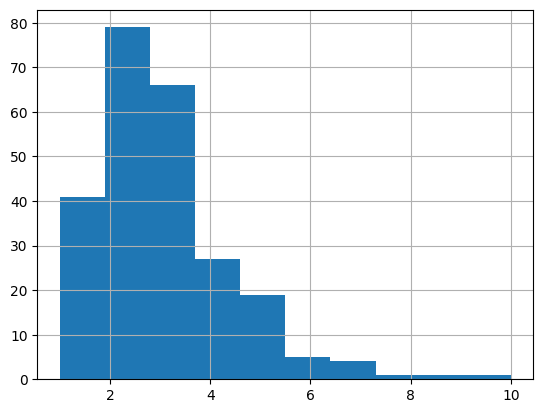

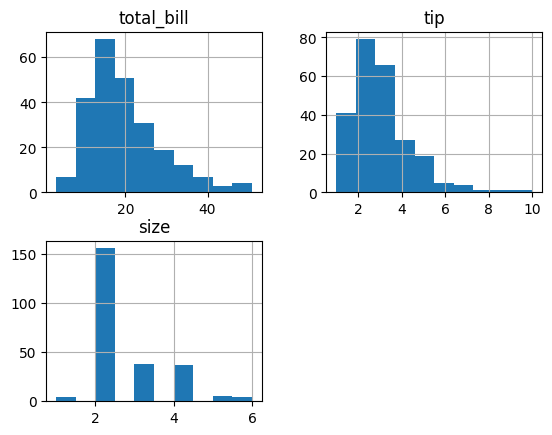

In [7]:
#histogram for the column 'tip'
df['tip'].hist()

#histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

### Histogram Analysis
- For the tips histogram, we can see that the distribution is significantly skewed to the right, meaning the most common tips (the mode) are in the $1.00-$4.00 range, the tips over $5.00 skew the distribution to the right meaning they are much less common.
- The total bill histogram shows a very similar story to the tips, heavily skewed to the right, meaning that more expensive bills are much less common.
- The size histogram shows a similar story to the other two, showing a right skew, however there are fewer bins than the other histograms, which makes sense as a party size can only be an integer (1,2,3,4,5 or 6)
- The histograms seem to indicate that all 3 columns have a high level of correlation with each other, which makes sense, a larger party size generally means a larger bill which in turn generally means a larger tip.

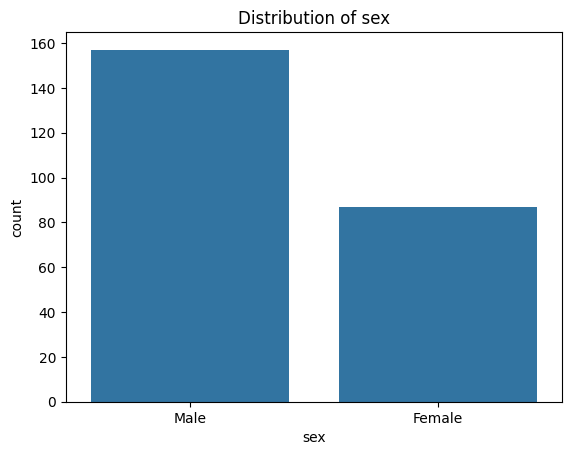

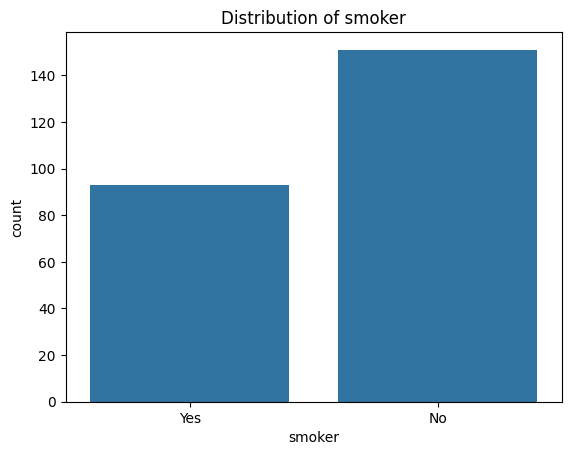

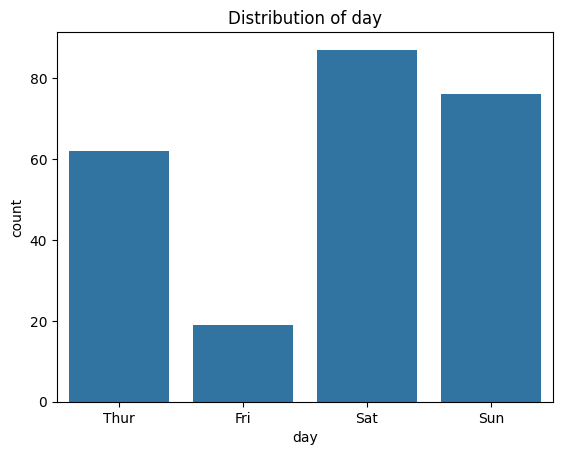

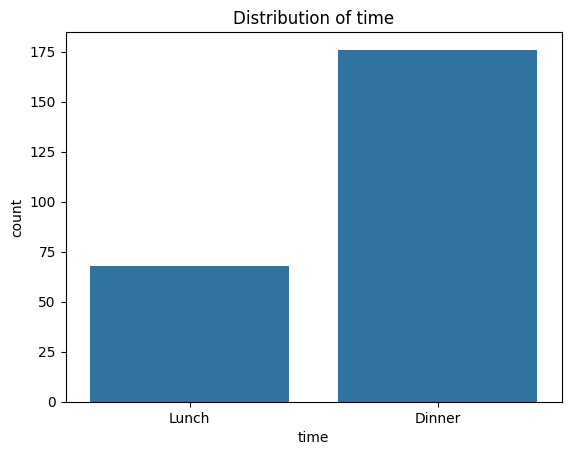

In [8]:
#step 5, categorical columns
# Inspect value counts by categorical column
df['day'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

### Analysis of Categorical Data
- Customers are more likely to me male than female.
- Customers are more more likely to be non-smokers than smokers.
- Saturday is the most popular day of the week, followed by Sunday and Thursday, Friday is significantly less busy. 
    - The other days of the week are not present in the data, possibly indicating the restaurant is either closed those days or whoever recording the data, possibly a waiter/waitress, doesn't work those days.
- Dinnertime is a much more popular time to eat than lunchtime.

In [9]:
#data transformation/feature engineering
# Renaming columns
df.rename(columns={'size': 'Party Size'}, inplace=True)
df.rename(columns={'tip': 'Tip'}, inplace=True)
df.rename(columns={'total_bill': 'Total Bill'}, inplace=True)

# Adding new columns

#Calculate the Price per person, Total bill divided by the party size.
df['Price Per Person'] = df['Total Bill'] / df['Party Size']

#Calculate Tip rate as the amount tipped divided by the total bill
df['Tip Rate'] = df['Tip'] / df['Total Bill']


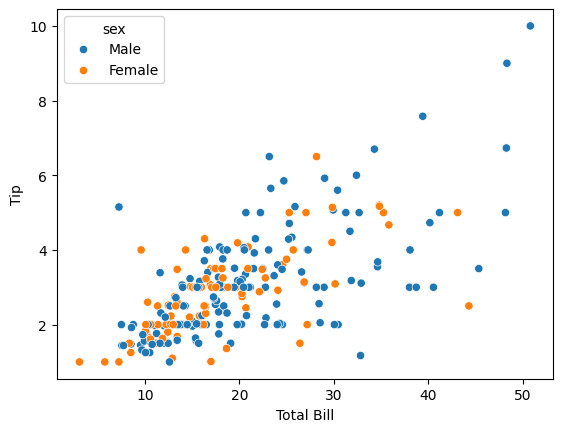

In [11]:
#visualizations
#sns.pairplot(df, hue='species')
sns.scatterplot(data=df, x="Total Bill", y="Tip", hue="sex")
plt.show()

### Visualization #1, Total Bill graphed against Tip Amount
##### **Goal: Find out if the Total bill amount is correlated with the amount tipped.**
This scatterplot shows the relationship between the price of the total bill and the amount tipped, the color of each datapoint indicates the sex of the customer. Some initial observations on this visualization:
- As expected there is a positive correlation between the amount tipped and the total bill.
- The sex of the customer doesn't seem to be significant when it comes to amount tipped.
- Most datapoints are in the $10-$30 total bill range and in the $1-$4 tip range, which aligns with the histograms generated previously.

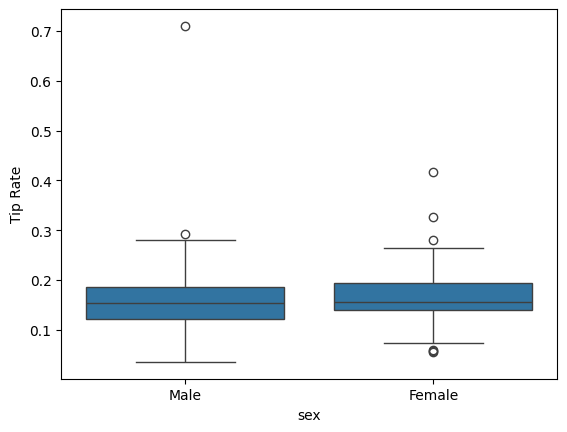

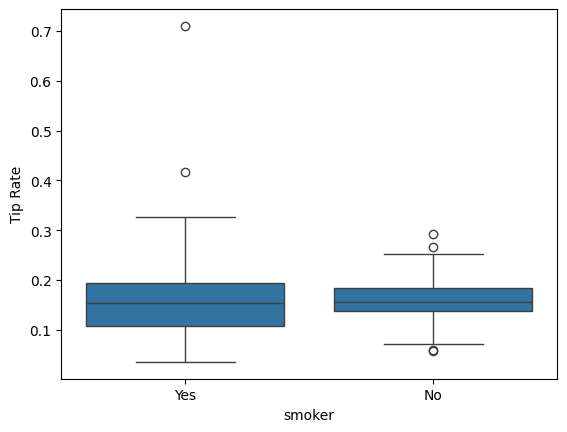

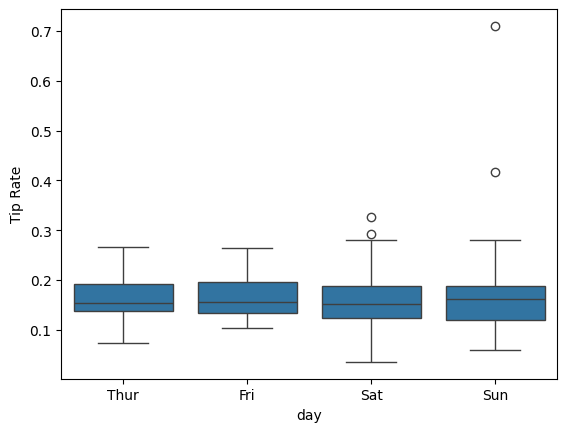

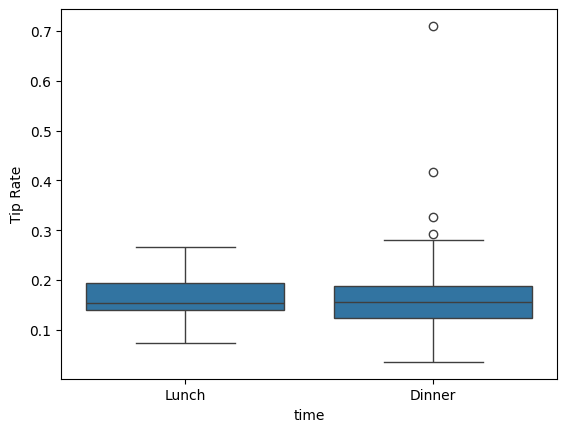

In [12]:
#create a separate boxplot for each categorical column in relation to amount tipped
for qual_var in df.select_dtypes(include=['object', 'category']).columns:
    sns.boxplot(data=df, x=qual_var, y='Tip Rate')
    plt.show()

### Visualization #2, Boxplots
##### **Goal: Find out if the the rate tipped changes based on different categories**
The boxplots for the rate tipped by each category show a very standardized tip rate. Excluding outliers, every category essentially shares the same boxplot, the median tip rate for every category is right around 15%. These plots suggest that the rate tipped by a customer does not changed based on sex of the customer, whether they are a smoker or not, the time or day of the week.

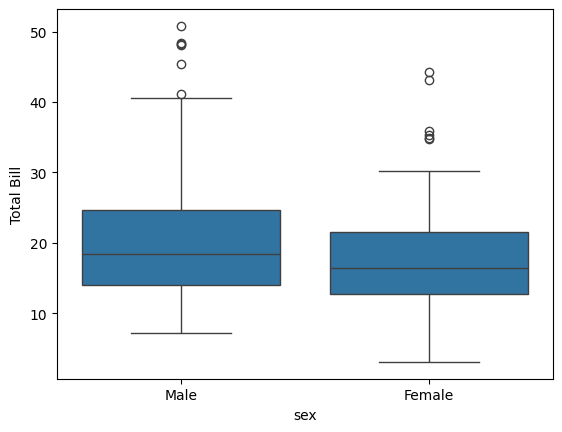

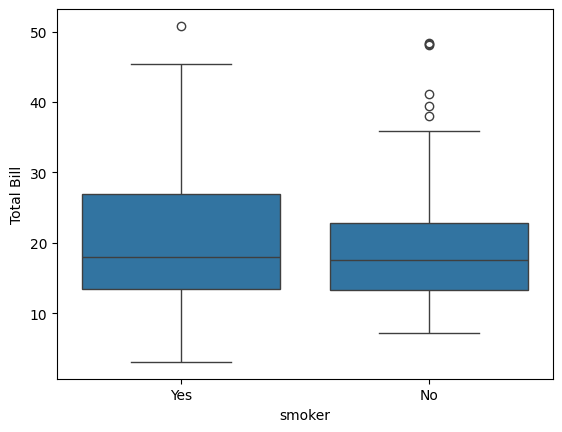

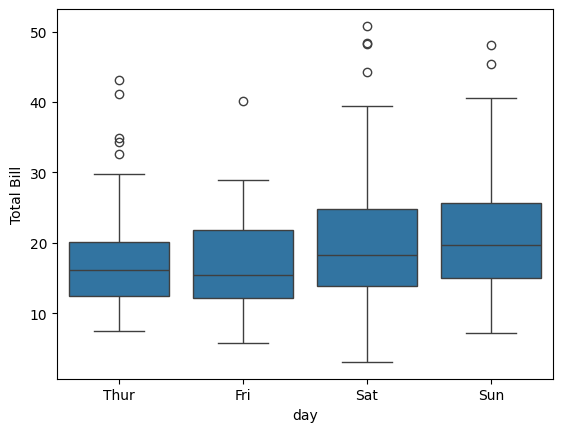

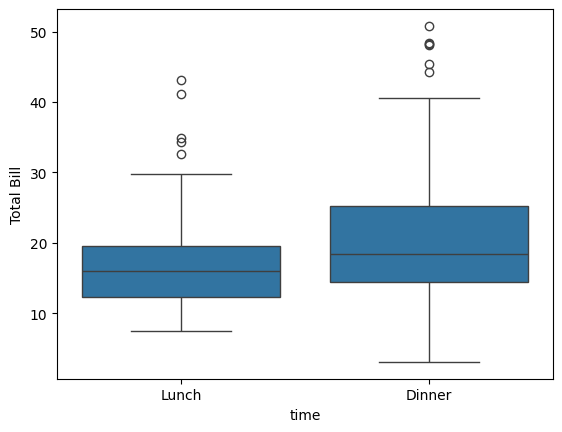

In [13]:
#create a separate boxplot for each categorical column in relation to total bill
for qual_var in df.select_dtypes(include=['object', 'category']).columns:
    sns.boxplot(data=df, x=qual_var, y='Total Bill')
    plt.show()

### Visualization #2, Boxplots
##### **Goal: Find out if the the total bill amount changes based on different categories**
The boxplots generated for total bill by each category do show more variation than the tip rate by category plots. This suggests that there are differences between the total bill amounts for each category of customer. Some findings I noticed:
- Men on average spend more than Women
- The amount spent is typically higher on Sunday and Saturday than it is on Thursday and Friday.
- The total bills at dinner are generally more than at lunch.